La regresión logística es una herramienta estadística poderosa que nos permite modelar la probabilidad de que ocurra un evento. A diferencia de la regresión lineal, que predice valores numéricos continuos, la regresión logística se enfoca en predecir eventos binarios (sí/no, 1/0).

## ¿Cómo funciona en términos estadísticos?

## Modelo Matemático:

Función Logística: La base de la regresión logística es la función logística, también conocida como función sigmoide. Esta función transforma cualquier valor real en un valor entre 0 y 1, representando una probabilidad. La ecuación es:

$ p = \frac{1}{1 + e^{-z}} $ 

donde:
p: Probabilidad del evento
z: Combinación lineal de las variables predictoras y sus coeficientes (similar a la ecuación de la recta en la regresión lineal).

## Combinación Lineal:

z = β0 + β1*X1 + β2*X2 + ... + βn*Xn

donde:
β0: Intercepto
β1, β2, ..., βn: Coeficientes de las variables independientes
X1, X2, ..., Xn: Valores de las variables independientes

## Estimación de Coeficientes:

- Máxima Verosimilitud: El objetivo es encontrar los valores de los coeficientes que maximicen la probabilidad de obtener los datos observados. Esto se logra mediante un proceso iterativo que ajusta los coeficientes hasta encontrar el mejor ajuste.

## Interpretación de Coeficientes:

- Signo: Un coeficiente positivo indica que al aumentar el valor de la variable - independiente correspondiente, aumenta la probabilidad del evento. Un coeficiente negativo indica lo contrario.
- Magnitud: La magnitud del coeficiente refleja la importancia de la variable en la predicción.

## Predicción:

Una vez que tenemos los coeficientes estimados, podemos calcular la probabilidad de que ocurra el evento para nuevos datos. Si la probabilidad es mayor que un umbral determinado (por ejemplo, 0.5), se predice que el evento ocurrirá.

## ¿Por qué la función logística?

- Limita la probabilidad: Asegura que las predicciones siempre estén entre 0 y 1, lo que es ideal para probabilidades.
- No linealidad: Permite modelar relaciones no lineales entre las variables.

## En resumen:
La regresión logística es un modelo estadístico que utiliza una función logística para modelar la probabilidad de un evento binario en función de una o más variables independientes. Al estimar los coeficientes del modelo, podemos entender la importancia de cada variable y hacer predicciones precisas.

In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Crear un DataFrame vacío
data = pd.DataFrame()

# Generar datos aleatorios para cada variable
data['Temperatura'] = np.random.uniform(15, 35, 1000)  # Temperatura entre 15 y 35 grados Celsius
data['Humedad'] = np.random.uniform(50, 90, 1000)  # Humedad entre 50% y 90%
data['Lluvia'] = np.random.randint(0, 30, 1000)  # Lluvia en mm (0 a 30 mm)
data['Pesticida'] = np.random.randint(0, 2, 1000)  # 0: No, 1: Sí
data['Enfermedad'] = np.random.randint(0, 2, 1000)  # 0: No, 1: Sí
print(data.head())
# Separar las variables independientes (X) y la variable dependiente (y)
X = data.drop('Enfermedad',axis=1)  # Variables predictoras
y = data['Enfermedad']  # Variable a predecir

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo
modelo = LogisticRegression()
modelo.fit(X_train, y_train)

# Hacer predicciones
y_pred = modelo.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)

# Obtener los coeficientes
print("Coeficientes:", modelo.coef_)


   Temperatura    Humedad  Lluvia  Pesticida  Enfermedad
0    31.663100  54.622468      20          1           1
1    32.002315  89.254581       0          1           0
2    18.009288  86.664781       4          0           1
3    19.149942  87.319631       5          1           1
4    24.847486  65.329794      26          1           0
Precisión del modelo: 0.49
Coeficientes: [[ 0.01636566  0.00225215 -0.00181738  0.06195114]]


Accuracy: 0.49
Precision: 0.4823529411764706
Recall: 0.8541666666666666
F1-score: 0.6165413533834586
Matriz de confusión:
 [[16 88]
 [14 82]]
AUC: 0.5312499999999999


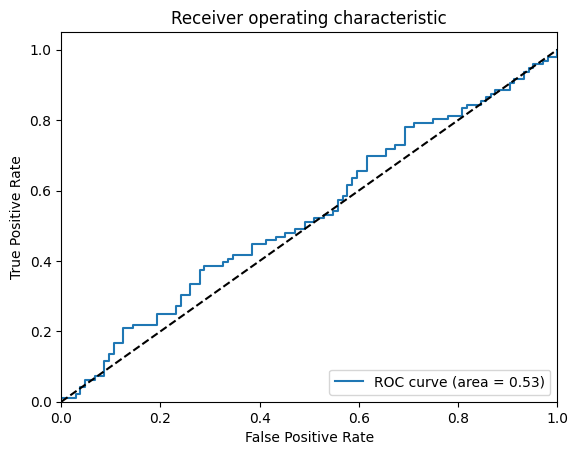

In [16]:
# Suponiendo que ya tienes tus datos cargados y el modelo entrenado

# Hacer predicciones sobre el conjunto de prueba
y_pred = modelo.predict(X_test)


# Calcular métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Curva ROC y AUC
fpr, tpr, thresholds = roc_curve(y_test, modelo.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

# Imprimir los resultados
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Matriz de confusión:\n", conf_matrix)
print("AUC:", roc_auc)

# Visualizar la curva ROC
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

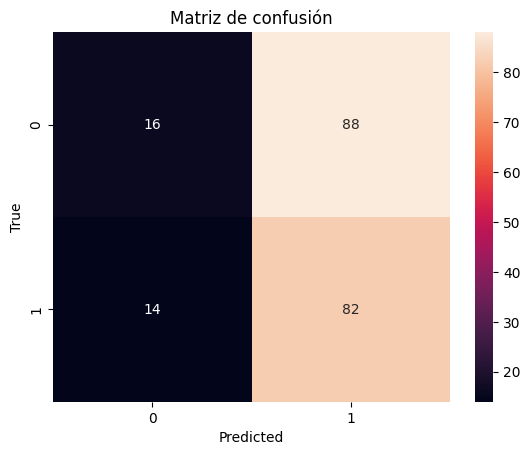

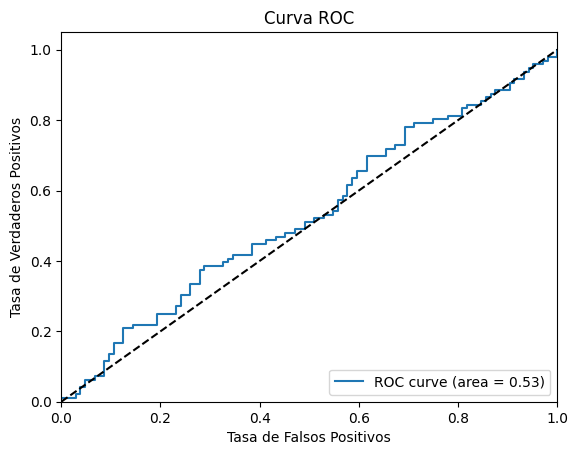

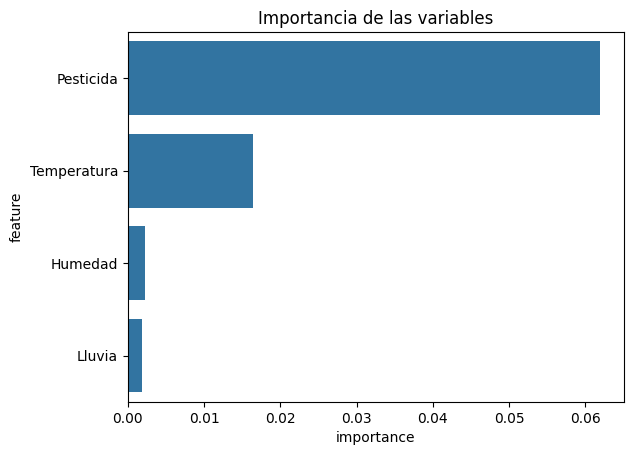

In [17]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Matriz de confusión')
plt.show()

# Visualizar la curva ROC
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

# Visualizar la importancia de las variables (si aplica)
importances = pd.DataFrame({'feature':X.columns, 'importance':np.abs(modelo.coef_[0])})
importances = importances.sort_values('importance', ascending=False)
sns.barplot(x='importance', y='feature', data=importances)
plt.title('Importancia de las variables')
plt.show()

In [ ]:
import cv2
import numpy as np
import pandas as pd

def extract_features(img_path):
    # Cargar la imagen
    img = cv2.imread(img_path)
    # Convertir a escala de grises
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Calcular características (ejemplo: promedio de intensidad)
    mean_intensity = np.mean(gray)
    # ... calcular otras características ...
    return mean_intensity

# Lista de rutas a las imágenes y sus etiquetas
images = ['image1.jpg', 'image2.jpg', ...]
labels = ['class1', 'class2', ...]

# Crear listas para almacenar las características y etiquetas
features = []
targets = []

# Extraer características y crear el DataFrame
for img, label in zip(images, labels):
    feature = extract_features(img)
    features.append(feature)
    targets.append(label)

# Crear el DataFrame
df = pd.DataFrame({'features': features, 'label': targets})